#### Balaji Kartheek(200968080)

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\tbala\OneDrive\Desktop\Academics\DataSets\Boston.csv")

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 1. Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’. 


In [5]:
boston_corr = df.corr()
boston_corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

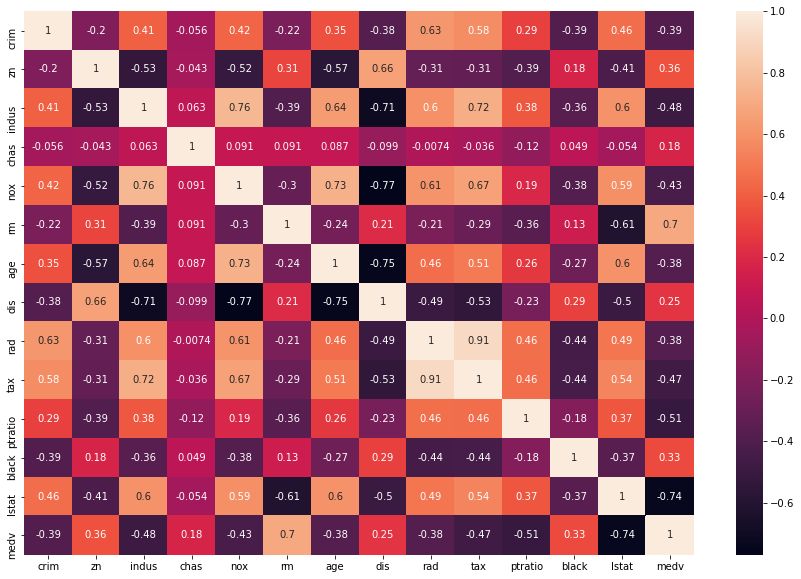

In [6]:
plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot = True)

In [7]:
medv_corr = boston_corr['medv']
medv_corr.abs().sort_values(ascending = False)    # getting the top 5 features which are correlated to predict 'MEDV'

medv       1.000000
lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
nox        0.427321
crim       0.388305
rad        0.381626
age        0.376955
zn         0.360445
black      0.333461
dis        0.249929
chas       0.175260
Name: medv, dtype: float64

In [8]:
pd.DataFrame(medv_corr).abs().sort_values(by='medv',ascending=False)

,medv
medv,1.000000
lstat,0.737663
rm,0.695360
ptratio,0.507787
indus,0.483725
tax,0.468536
nox,0.427321
crim,0.388305
rad,0.381626
age,0.376955


## lstat,rm,ptratio,indus,tax are the best 5 features for predicting the medv

## 2. Using sklearn.linear_model, find the multiple regression model for the boston.csv dataset using the best 3 features. (from sklearn.linear_model import LinearRegression) 



In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()       # creation of the object to the LinearRegression Function

In [10]:
x = df[['lstat','rm','ptratio']]
y = df['medv']

In [11]:
x

,lstat,rm,ptratio
0,4.98,6.575,15.3
1,9.14,6.421,17.8
2,4.03,7.185,17.8
3,2.94,6.998,18.7
4,5.33,7.147,18.7
...,...,...,...
501,9.67,6.593,21.0
502,9.08,6.120,21.0
503,5.64,6.976,21.0
504,6.48,6.794,21.0


In [12]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [13]:
model.fit(x,y)

LinearRegression()

In [14]:
model.intercept_

18.567111505395253

In [15]:
model.coef_

array([-0.57180569,  4.51542094, -0.93072256])

In [16]:
model.score(x,y)
# the accuracy of the model is 67.86%

0.6786241601613112

## 3. Find the accuracy of the model using appropriate metrics using 80, 20 split for training and test.



In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [24]:
data_split_model = LinearRegression()

In [25]:
data_split_model.fit(x_train,y_train)

LinearRegression()

In [26]:
data_split_model.intercept_

16.190837806719635

In [27]:
data_split_model.coef_

array([-0.55057802,  4.69936289, -0.88086298])

In [28]:
data_split_model.score(x_test,y_test)


0.7357188372590253